In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix,\
    accuracy_score, make_scorer
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.neural_network import MLPClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/UFF/TCC/Implementação/

/content/drive/MyDrive/UFF/TCC/Implementação


In [ ]:
df = pd.read_csv('forth_trace.csv')

# Filter
df = df.loc[~df['class'].isin(list(range(8,17)))]

X = df.drop(columns=['class'])
y = df['class']

# balanced_accuracy = (recall + specificity) / 2
metrics = ['f1_weighted', 'balanced_accuracy', 'accuracy']

In [ ]:
# Variables for average classification report
originalclass = []
predictedclass = []

#Make our customer score
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

## MLP Report

In [ ]:
mlp = MLPClassifier(activation = 'logistic',
                    solver='adam',
                    alpha=1e-5,
                    learning_rate = 'invscaling',
                    max_iter = 1600,
                    hidden_layer_sizes=(450,),
                    random_state=42)

acc = cross_val_score(mlp, X=X, y=y, cv=10,
                      scoring=make_scorer(
                          classification_report_with_accuracy_score
                      ))

print("Accuracy")
print("mean = {mean:.2f}%;\tstd = {std:.2f};"
      .format(mean = acc.mean()*100,
              std = acc.std()))

# Average values in classification report for all folds in a K-fold Cross-validation
print(classification_report(originalclass, predictedclass))

Accuracy
mean = 63.50%;	std = 0.05;
              precision    recall  f1-score   support

           1       0.87      0.92      0.90      4081
           2       0.64      0.67      0.66      2189
           3       0.64      0.55      0.59      2202
           4       0.53      0.53      0.53      3664
           5       0.55      0.55      0.55      3670
           6       0.66      0.59      0.62      2328
           7       0.35      0.40      0.37      1178

    accuracy                           0.63     19312
   macro avg       0.61      0.60      0.60     19312
weighted avg       0.64      0.63      0.63     19312



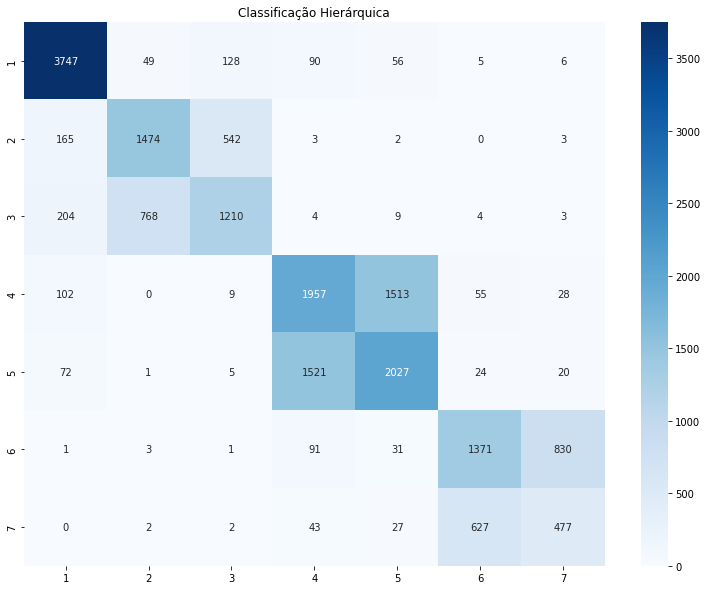

In [ ]:
cf_matrix = confusion_matrix(originalclass, predictedclass)

categories = np.unique(y).tolist()
plt.figure(figsize=(13,10))
plt.title('Classificação Hierárquica')
sns.heatmap(cf_matrix, annot=True, fmt="", cmap='Blues', cbar=True, xticklabels=categories, yticklabels=categories)